In [1]:
import xtrack as xt
import xobjects as xo
import numpy as np
import matplotlib.pyplot as plt

from xnlbd.visualise.orbits import get_orbit_points

# Test xnlbd

In [3]:
line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000
line.build_tracker()
line.optimize_for_tracking()

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           
The line already has an associated tracker
Disable xdeps expressions
Replance slices with equivalent elements
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data


In [4]:
idx_1 = 5190
idx_2 = 12671

print(line.element_names[idx_1], line.element_names[idx_2])

mplh.21431_aper_upstream qfa.41810_aper_upstream


In [5]:
orbits_1 = get_orbit_points(
    line,
    element="mplh.21431_aper_upstream",
    planes="HVL",
    nemitt_x=3.5e-6,
    nemitt_y=3.5e-6,
    nemitt_z=0.224,
    num_pts=100,
    num_turns=1000
)


Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/home/lpauwels/miniforge3/envs/xsuite/lib/python3.11/site-packages/xtrack/particles/particles.py:1336: RuntimeWarning: invalid value encountered in divide
  pzeta = self.ptau / self.beta0
/home/lpauwels/Xsuite/xnlbd/xnlbd/visualise/orbits/orbits.py:455: RuntimeWarning: divide by zero encountered in divide
  q


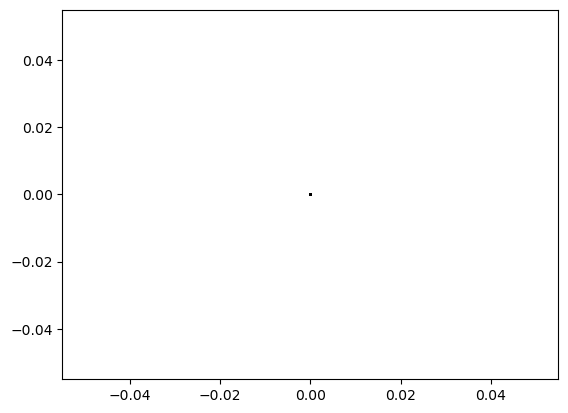

In [6]:
plt.figure()
plt.plot(
    orbits_1["H_orbit_points"]["y"] * 1e3, 
    orbits_1["H_orbit_points"]["py"] * 1e6, 
    color='black', 
    marker='.', 
    markersize=0.1,
    linestyle='None'
)
plt.show()

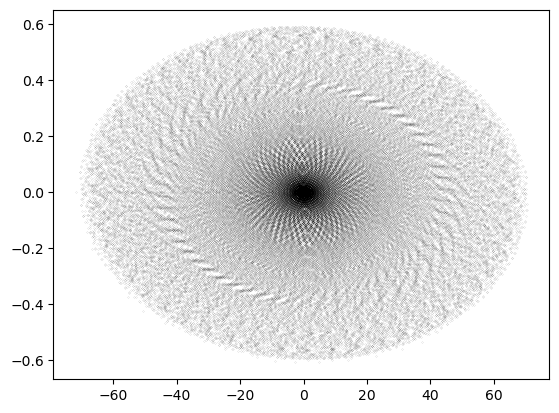

In [8]:
plt.figure()
plt.plot(
    orbits_1["H_orbit_points"]["zeta"] * 1e3, 
    orbits_1["H_orbit_points"]["delta"] * 1e3, 
    color='black', 
    marker='.', 
    markersize=0.1,
    linestyle='None'
)
plt.show()

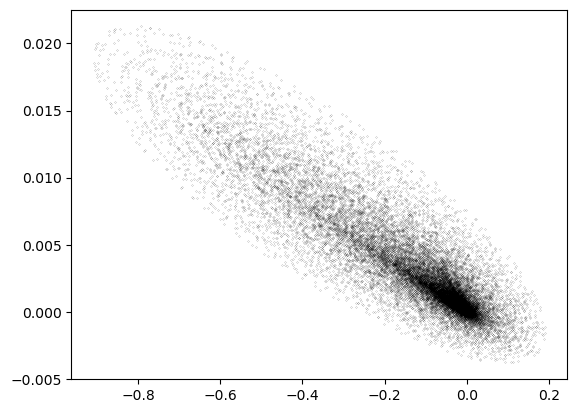

In [7]:
plt.figure()
plt.plot(
    orbits_1["V_orbit_points"]["x"] * 1e3, 
    orbits_1["V_orbit_points"]["px"] * 1e3, 
    color='black', 
    marker='.', 
    markersize=0.1,
    linestyle='None'
)
plt.show()

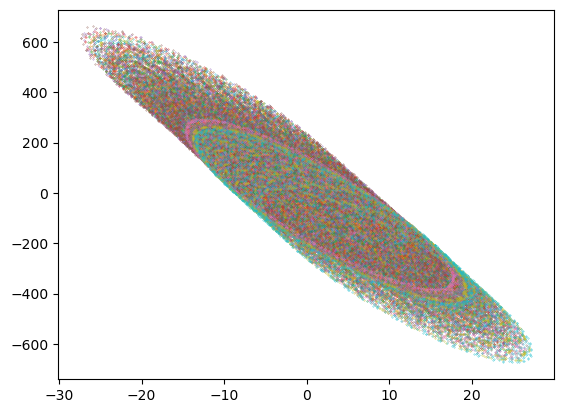

In [32]:
plt.figure()
for i in range(N_part):
    plt.plot(
        orbits_1["L_orbit_points"]["x"][i, :] * 1e3, 
        orbits_1["L_orbit_points"]["px"][i, :] * 1e6, 
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
# plt.xlim((-750, 750))
plt.show()

In [10]:
orbits_1["H_orbit_points"]["delta"]

LinkedArrayCpu([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 0.00000000e+00, -1.10260729e-06, -1.94050741e-06, ...,
                  5.31047145e-06,  5.90430202e-06,  6.42751588e-06],
                [ 0.00000000e+00, -2.20214620e-06, -3.86787527e-06, ...,
                  1.05801705e-05,  1.17645257e-05,  1.28176167e-05],
                ...,
                [            nan,             nan,             nan, ...,
                             nan,             nan,             nan],
                [            nan,             nan,             nan, ...,
                             nan,             nan,             nan],
                [            nan,             nan,             nan, ...,
                             nan,             nan,             nan]])

# X uniform distribution, rest on closed orbit

In [115]:
line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000
line.build_tracker()
line.optimize_for_tracking()

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           
The line already has an associated tracker
Disable xdeps expressions
Replance slices with equivalent elements
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data


In [87]:
part = xt.Particles(
    x = np.linspace(-40e-3, 40e-3, N_part), #np.ones(N_part) * tw.particle_on_co.x[0], #np.linspace(-40e-3, 40e-3, N_part),
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.ones(N_part) * tw.particle_on_co.y[0],
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.ones(N_part) * tw.particle_on_co.delta[0],#np.linspace(-5e-3, 5e-3, N_part), #np.ones(N_part) * tw.particle_on_co.delta[0],
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [116]:
part2 = xt.Particles(
    x = np.linspace(-40e-3, 40e-3, N_part), #np.ones(N_part) * tw.particle_on_co.x[0], #np.linspace(-40e-3, 40e-3, N_part),
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.ones(N_part) * tw.particle_on_co.y[0],
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.ones(N_part) * tw.particle_on_co.delta[0],#np.linspace(-5e-3, 5e-3, N_part), #np.ones(N_part) * tw.particle_on_co.delta[0],
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [117]:
part = xt.Particles(
    x_norm = np.array([0, 1e-6]),
    px_norm = np.array([0, 0]),
    y_norm = np.array([0, 0]),
    py_norm = np.array([0, 0]),
    delta = np.array([0, 0]),
    zeta = np.array([0, 0])
)

In [118]:
monitor_1 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_2 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [119]:
idx_1 = 5190
idx_2 = 1

line.discard_tracker()
line.insert_element(
    name="monit1", 
    element=monitor_1, 
    at=idx_1+1
)

line.insert_element(
    name="monit2", 
    element=monitor_2, 
    at=idx_2
)
line.build_tracker()

In [120]:
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

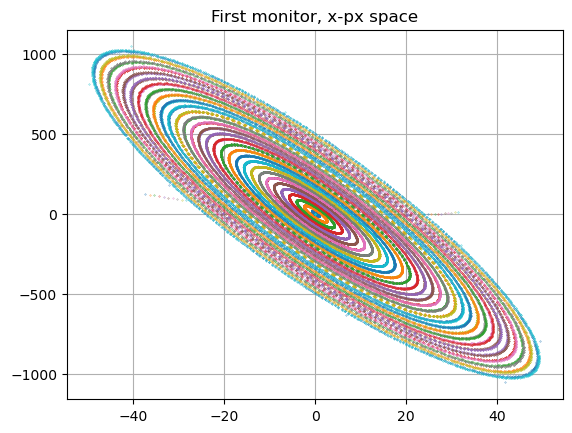

In [92]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.x[i, :] * 1e3,
        monitor_1.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, x-px space')
plt.grid()
plt.show()

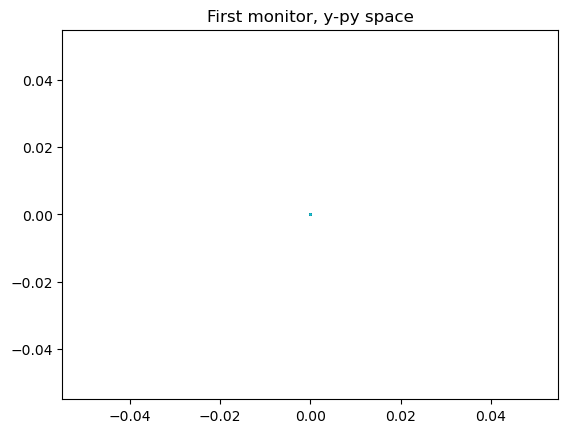

In [93]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.y[i, :] * 1e3,
        monitor_1.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, y-py space')
plt.show()

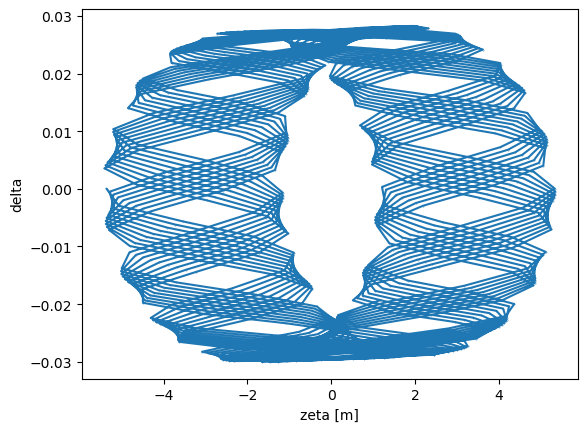

In [94]:
plt.figure()
for i in range(21,22):#N_part):
    plt.plot(
        monitor_1.zeta[i, :]*1e3,
        monitor_1.delta[i, :]*1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='-'
    )
plt.xlabel('zeta [m]')
plt.ylabel('delta')
plt.show()

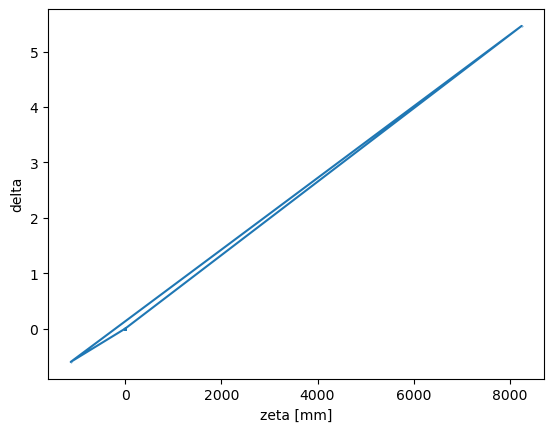

In [124]:
plt.figure()
for i in range(1):#N_part):
    plt.plot(
        monitor_2.zeta[i, :]*1e3,
        monitor_2.delta[i, :]*1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='-'
    )
plt.xlabel('zeta [mm]')
plt.ylabel('delta')
plt.show()

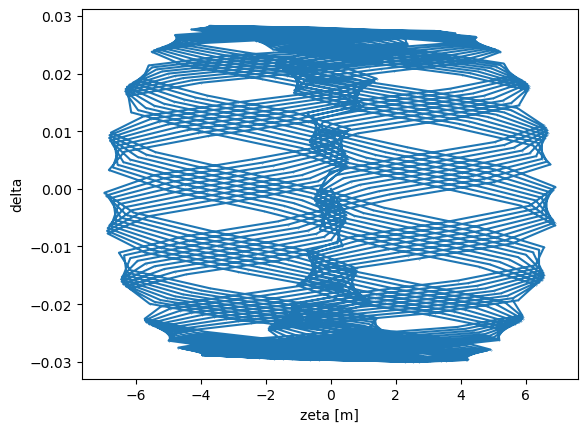

In [108]:
plt.figure()
for i in range(21,22):#N_part):
    plt.plot(
        monitor_2.zeta[i, :]*1e3,
        monitor_2.delta[i, :]*1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='-'
    )
plt.xlabel('zeta [m]')
plt.ylabel('delta')
plt.show()

# Large bucket, x, px, y, py at zero

In [29]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


In [30]:
part = xt.Particles(
    x = np.ones(N_part) * tw.particle_on_co.x[0], #np.linspace(-40e-3, 40e-3, N_part),
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.ones(N_part) * tw.particle_on_co.y[0],
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.linspace(-5e-3, 5e-3, N_part), #np.ones(N_part) * tw.particle_on_co.delta[0],
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [31]:
monitor_1 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_2 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [32]:
idx_1 = 5190
idx_2 = 12671

line.discard_tracker()
line.insert_element(
    name="monit1", 
    element=monitor_1, 
    at=idx_1+1
)

line.insert_element(
    name="monit2", 
    element=monitor_2, 
    at=idx_2+2
)
line.build_tracker()

In [33]:
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

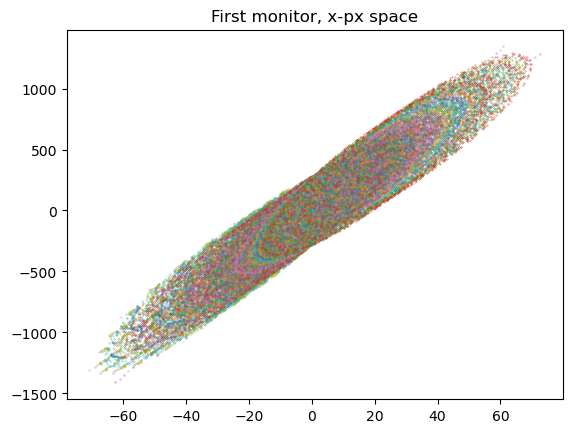

In [34]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.x[i, :] * 1e3,
        monitor_1.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, x-px space')
plt.show()

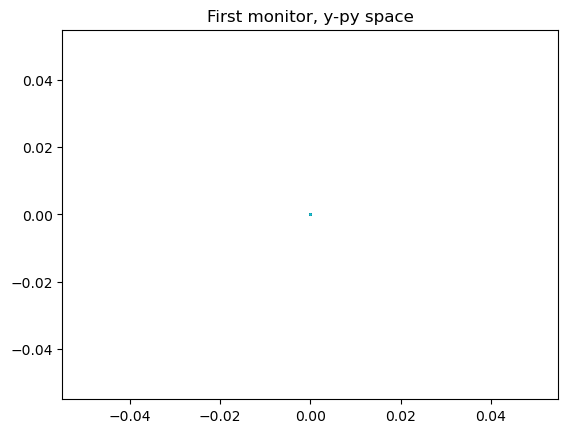

In [35]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.y[i, :] * 1e3,
        monitor_1.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, y-py space')
plt.show()

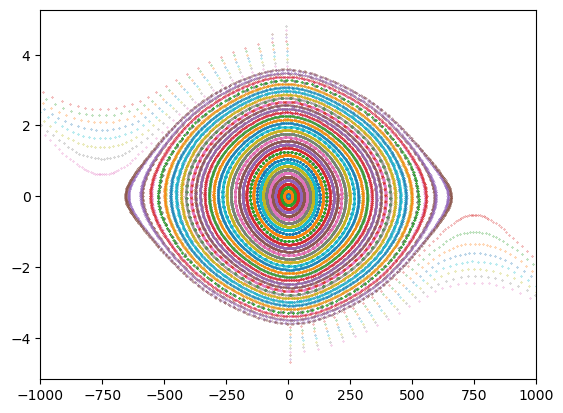

In [ ]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.zeta[i, :] * 1e3,
        monitor_1.delta[i, :] * 1e3,
        # color='black', 
        marker='.', idx_1 = 5190
idx_2 = 12671
    )
plt.xlim((-1000, 1000))
plt.show()

# Dora retest 

In [56]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000
line.build_tracker()
line.optimize_for_tracking()

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           
The line already has an associated tracker
Disable xdeps expressions
Replance slices with equivalent elements
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data


In [46]:
part = xt.Particles(
    x = np.ones(N_part) * tw.particle_on_co.x[0],#np.linspace(-40e-3, 40e-3, N_part), # np.ones(N_part) * tw.particle_on_co.x[0],
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.linspace(-16e-3, 16e-3, N_part),
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.ones(N_part) * tw.particle_on_co.delta[0], #np.linspace(-5e-3, 5e-3, N_part),
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [47]:
monitor_1 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_2 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [48]:
idx_1 = 5190
idx_2 = 12671

line.discard_tracker()
line.insert_element(
    name="monit1", 
    element=monitor_1, 
    at=idx_1+1
)

line.insert_element(
    name="monit2", 
    element=monitor_2, 
    at=idx_2+2
)
line.build_tracker()

In [49]:
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

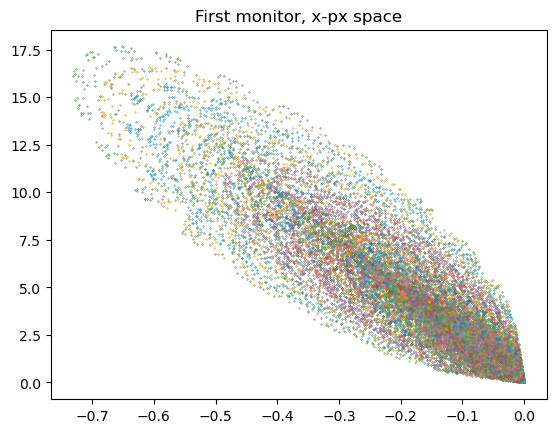

In [50]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.x[i, :] * 1e3,
        monitor_1.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, x-px space')
plt.show()

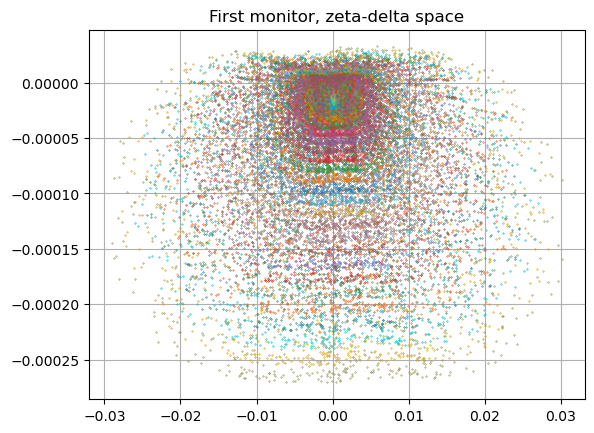

In [51]:
plt.figure()
for i in part.particle_id[part.state >0]:
    plt.plot(
        monitor_1.zeta[i, :] * 1e3,
        monitor_1.delta[i, :] * 1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.grid()
plt.title('First monitor, zeta-delta space')
plt.show()

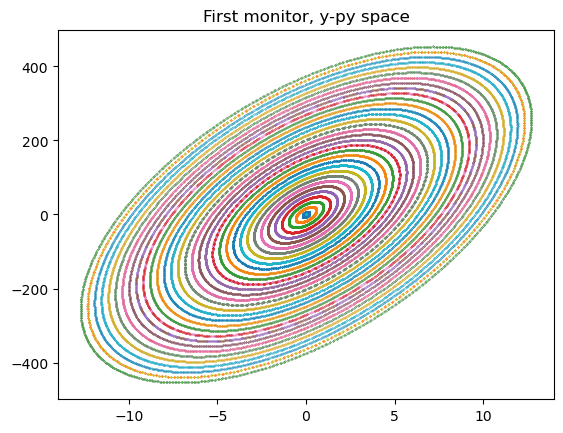

In [53]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.y[i, :] * 1e3,
        monitor_1.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, y-py space')
plt.show()

# Monitor in bottleneck

In [18]:
line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
line.optimize_for_tracking()

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           
Disable xdeps expressions
Replance slices with equivalent elements
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data


In [19]:
N_part = 15560
N_turn = 1000

In [20]:
idx_1 = 5190
idx_2 = 12671

print(line.element_names[idx_1], line.element_names[idx_2])

mplh.21431_aper_upstream qfa.41810_aper_upstream


In [21]:
monitor_in = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [63]:
monitor_prev = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_in = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_after = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [64]:
line.discard_tracker()
line.insert_element(
    name="monit_prev", 
    element=monitor_prev, 
    at=5190-1
)

line.insert_element(
    name="monit_in", 
    element=monitor_in, 
    at=5190+2
)

line.insert_element(
    name="monit_after", 
    element=monitor_after, 
    at=5190+4
)
line.build_tracker()

In [22]:
line.discard_tracker()
line.insert_element(
    name="monit_in", 
    element=monitor_in, 
    at=5190+1
)
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [ ]:
x_sq = np.linspace(-0.055, 0.055, N_part)
y_sq = np.linspace(-0.4, 0.4, N_part)

X, Y = np.meshgrid(x_sq, y_sq, indexing='xy')

x_flat = X.ravel()
y_flat = Y.ravel()

px = np.ones_like(x_flat)*tw.particle_on_co.px[0]
py = np.ones_like(y_flat)*tw.particle_on_co.py[0]
zeta = np.ones_like(x_flat)*tw.particle_on_co.zeta[0]
delta = np.ones_like(x_flat)*tw.particle_on_co.delta[0]

part = line.build_particles(x=x_flat, px=px, y=y_flat, py=py, nemitt_x=3.5e-6, nemitt_y=3.5e-6, zeta=zeta, delta=delta)
part2 = line.build_particles(x=x_flat, px=px, y=y_flat, py=py, nemitt_x=3.5e-6, nemitt_y=3.5e-6, zeta=zeta, delta=delta)

In [23]:
x_int = np.linspace(-12.7, 12.7, round(12.7*2/0.1)+1)
x_ext = np.linspace(-14.7, 14.7, round(14.7*2/0.1)+1)

y_int = np.linspace(-4.6683, 4.6683, round(4.6683*2/0.1)+1)
y_ext = np.linspace(-6.6683, 6.6683, round(6.6683*2/0.1)+1)

X, Y = np.meshgrid(x_ext, y_ext, indexing='xy')

x_flat = X.ravel()
y_flat = Y.ravel()

# Filter out points that fall inside the inner rectangle
mask = ~((x_flat >= x_int.min()) & (x_flat <= x_int.max()) &
         (y_flat >= y_int.min()) & (y_flat <= y_int.max()))

# Apply mask
x_hollow = x_flat[mask]
y_hollow = y_flat[mask]
x_norm = x_hollow
y_norm = y_hollow
px_norm = np.ones_like(x_norm)*tw.particle_on_co.px[0]
py_norm = np.ones_like(y_norm)*tw.particle_on_co.py[0]
zeta = np.ones_like(x_norm)*tw.particle_on_co.zeta[0]
delta = np.ones_like(x_norm)*tw.particle_on_co.delta[0]

part = line.build_particles(x_norm=x_norm, px_norm=px_norm, y_norm=y_norm, py_norm=py_norm, nemitt_x=3.5e-6, nemitt_y=3.5e-6, zeta=zeta, delta=delta)
part2 = line.build_particles(x_norm=x_norm, px_norm=px_norm, y_norm=y_norm, py_norm=py_norm, nemitt_x=3.5e-6, nemitt_y=3.5e-6, zeta=zeta, delta=delta)

In [24]:
# line.discard_tracker()
# line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

In [48]:
line.elements[5191]

LimitRect(min_x=-0.05, max_x=0.05, min_y=-0.386, max_y=0.386, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0)

Text(0.5, 1.0, 'zeta-delta space')

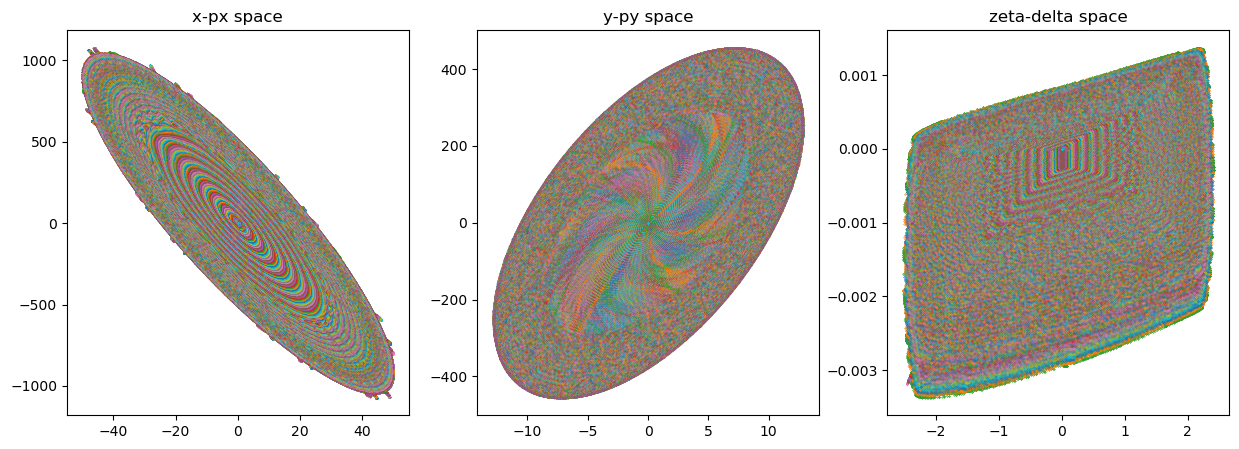

In [18]:
fig, ax  = plt.subplots(1, 3, figsize=(15, 5))
for i in range(N_part):
    ax[0].plot(
        monitor_in.x[i, :] * 1e3,
        monitor_in.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
    ax[1].plot(
        monitor_in.y[i, :] * 1e3,
        monitor_in.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
    ax[2].plot(
        monitor_in.zeta[i, :] * 1e3,
        monitor_in.delta[i, :] * 1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
ax[0].set_title('x-px space')
ax[1].set_title('y-py space')
ax[2].set_title('zeta-delta space')

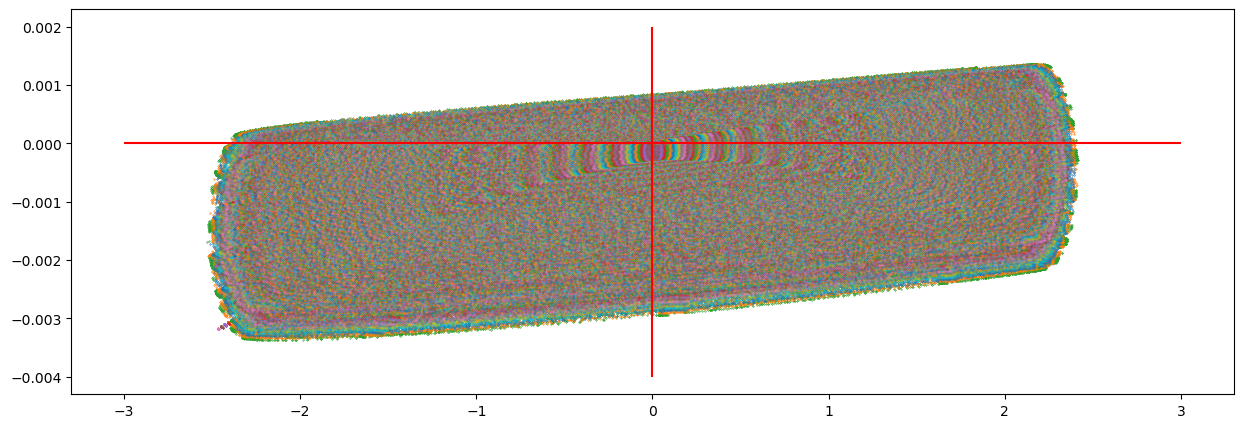

In [25]:
plt.figure(figsize=(15, 5))
for i in range(N_part):
    plt.plot(
        monitor_in.zeta[i, :] * 1e3,
        monitor_in.delta[i, :] * 1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.hlines(0, -3, 3, color='red')
plt.vlines(0, -0.004, 0.002, color='red')

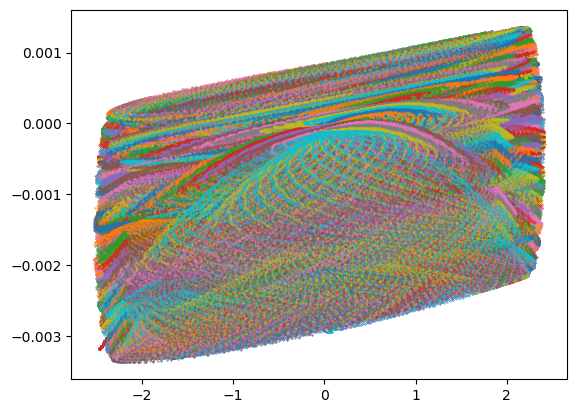

In [45]:
plt.figure() 
for turn in range(N_turn):
    plt.plot(
        monitor_in.zeta[:, turn] * 1e3,
        monitor_in.delta[:, turn] * 1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )

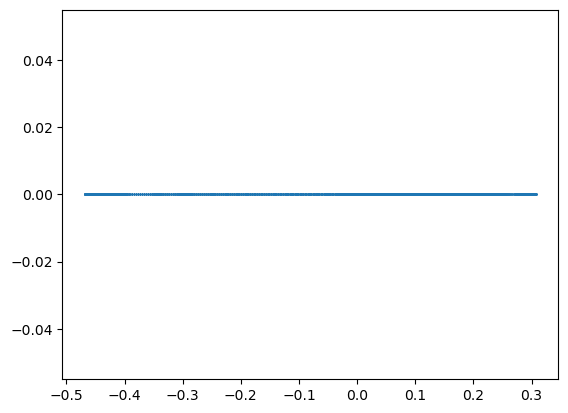

In [29]:
plt.figure()
plt.plot(
    monitor_in.zeta[:,0]*1e3,
    monitor_in.delta[:,0]*1e3,
    marker='.',
    linestyle='None',
    markersize=0.5
)

In [50]:
len(monitor_in.x)

15560

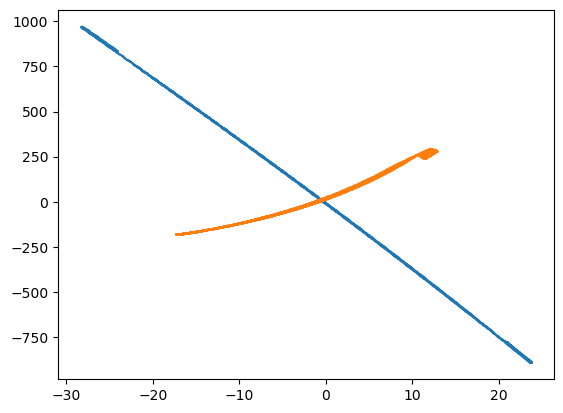

In [66]:
plt.figure()

for turn in range(2):
    m = monitor_in.state[:,turn]>0
    plt.plot(
        monitor_in.x[:, turn][m] * 1e3,
        monitor_in.px[:, turn][m] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )

In [64]:
np.unique(monitor_in.state[:,0], return_counts=True)

(array([0, 1]), array([ 5174, 10386]))

In [71]:
np.unique(monitor_in.particle_id, return_counts=True)


(array([    0,  1238,  1239, ..., 14183, 14184, 14185]),
 array([6931962,       1,       1, ...,       1,       1,       1]))

In [92]:
turn = 100
m = monitor_in.state[:,turn]>0
np.unique(monitor_in.particle_id[:,turn][m])[:10]

array([1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549])

In [77]:
monitor_in.particle_id[:,turn][m]

array([ 1238,  1239,  1240, ..., 14183, 14184, 14185])

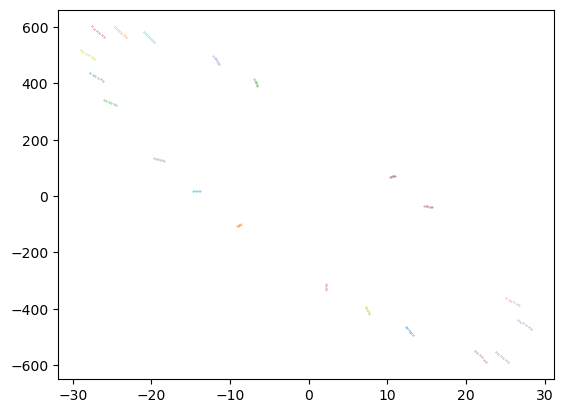

: 

In [ ]:
plt.figure()
for turn in range(20):
    plt.plot(
        monitor_in.x[1540:1546, turn] * 1e3,
        monitor_in.px[1540:1546, turn] * 1e6,
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )